## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.078977  0.282099  1.543106 -1.174207 -0.001318  0.356924
1  1.534031 -0.801564  0.494528 -1.588426 -0.240072 -0.857662
2  1.004231  1.120972  0.495842 -0.516400 -0.820927  0.015516
3 -1.434416  0.784502 -1.186403 -1.338476 -0.182517 -1.413860
4 -1.392453 -0.178403 -1.148367  0.399386  0.361300 -0.328442


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9996756	total: 58.2ms	remaining: 58.1s
1:	learn: 0.9913523	total: 58.8ms	remaining: 29.4s
2:	learn: 0.9819463	total: 59.4ms	remaining: 19.8s
3:	learn: 0.9708670	total: 60.1ms	remaining: 15s
4:	learn: 0.9620402	total: 60.6ms	remaining: 12.1s
5:	learn: 0.9521665	total: 61.1ms	remaining: 10.1s
6:	learn: 0.9408439	total: 61.6ms	remaining: 8.74s
7:	learn: 0.9319354	total: 62.1ms	remaining: 7.7s
8:	learn: 0.9231797	total: 62.6ms	remaining: 6.89s
9:	learn: 0.9142016	total: 63.1ms	remaining: 6.25s
10:	learn: 0.9066550	total: 63.6ms	remaining: 5.72s
11:	learn: 0.8982174	total: 64.1ms	remaining: 5.28s
12:	learn: 0.8898994	total: 64.6ms	remaining: 4.91s
13:	learn: 0.8823694	total: 65.1ms	remaining: 4.59s
14:	learn: 0.8751596	total: 65.5ms	remaining: 4.3s
15:	learn: 0.8685557	total: 66ms	remaining: 4.06s
16:	learn: 0.8610718	total: 66.5ms	remaining: 3.84s
17:	learn: 0.8539798	total: 66.9ms	remaining: 3.65s
18:	learn: 0.8458766	total: 67.4ms	remaining: 3.48

112:	learn: 0.3857185	total: 109ms	remaining: 854ms
113:	learn: 0.3832186	total: 109ms	remaining: 850ms
114:	learn: 0.3802887	total: 110ms	remaining: 847ms
115:	learn: 0.3776153	total: 110ms	remaining: 842ms
116:	learn: 0.3746668	total: 111ms	remaining: 837ms
117:	learn: 0.3717268	total: 111ms	remaining: 833ms
118:	learn: 0.3688255	total: 112ms	remaining: 829ms
119:	learn: 0.3664771	total: 113ms	remaining: 825ms
120:	learn: 0.3638762	total: 113ms	remaining: 821ms
121:	learn: 0.3611353	total: 113ms	remaining: 816ms
122:	learn: 0.3585532	total: 114ms	remaining: 812ms
123:	learn: 0.3555936	total: 114ms	remaining: 808ms
124:	learn: 0.3529418	total: 115ms	remaining: 803ms
125:	learn: 0.3505578	total: 115ms	remaining: 799ms
126:	learn: 0.3479534	total: 116ms	remaining: 795ms
127:	learn: 0.3445574	total: 116ms	remaining: 791ms
128:	learn: 0.3417940	total: 117ms	remaining: 787ms
129:	learn: 0.3393216	total: 117ms	remaining: 783ms
130:	learn: 0.3370759	total: 117ms	remaining: 778ms
131:	learn: 

282:	learn: 0.1140163	total: 187ms	remaining: 474ms
283:	learn: 0.1133398	total: 188ms	remaining: 474ms
284:	learn: 0.1124305	total: 188ms	remaining: 473ms
285:	learn: 0.1117294	total: 189ms	remaining: 472ms
286:	learn: 0.1110318	total: 189ms	remaining: 471ms
287:	learn: 0.1102367	total: 190ms	remaining: 469ms
288:	learn: 0.1095354	total: 190ms	remaining: 468ms
289:	learn: 0.1088397	total: 191ms	remaining: 467ms
290:	learn: 0.1080706	total: 191ms	remaining: 466ms
291:	learn: 0.1073461	total: 192ms	remaining: 465ms
292:	learn: 0.1066351	total: 192ms	remaining: 463ms
293:	learn: 0.1057363	total: 193ms	remaining: 462ms
294:	learn: 0.1048795	total: 193ms	remaining: 461ms
295:	learn: 0.1041393	total: 193ms	remaining: 460ms
296:	learn: 0.1034646	total: 194ms	remaining: 459ms
297:	learn: 0.1026821	total: 194ms	remaining: 458ms
298:	learn: 0.1019457	total: 195ms	remaining: 456ms
299:	learn: 0.1011579	total: 195ms	remaining: 455ms
300:	learn: 0.1005238	total: 196ms	remaining: 454ms
301:	learn: 

504:	learn: 0.0349238	total: 292ms	remaining: 286ms
505:	learn: 0.0346539	total: 292ms	remaining: 285ms
506:	learn: 0.0344260	total: 293ms	remaining: 285ms
507:	learn: 0.0343719	total: 293ms	remaining: 284ms
508:	learn: 0.0341094	total: 294ms	remaining: 283ms
509:	learn: 0.0339851	total: 294ms	remaining: 283ms
510:	learn: 0.0339324	total: 295ms	remaining: 282ms
511:	learn: 0.0338229	total: 295ms	remaining: 281ms
512:	learn: 0.0336038	total: 296ms	remaining: 281ms
513:	learn: 0.0334848	total: 296ms	remaining: 280ms
514:	learn: 0.0334340	total: 297ms	remaining: 279ms
515:	learn: 0.0332267	total: 297ms	remaining: 279ms
516:	learn: 0.0331767	total: 298ms	remaining: 278ms
517:	learn: 0.0329733	total: 298ms	remaining: 277ms
518:	learn: 0.0327614	total: 299ms	remaining: 277ms
519:	learn: 0.0325371	total: 299ms	remaining: 276ms
520:	learn: 0.0323169	total: 300ms	remaining: 276ms
521:	learn: 0.0322233	total: 300ms	remaining: 275ms
522:	learn: 0.0321754	total: 301ms	remaining: 274ms
523:	learn: 

667:	learn: 0.0173312	total: 369ms	remaining: 183ms
668:	learn: 0.0172305	total: 370ms	remaining: 183ms
669:	learn: 0.0171401	total: 370ms	remaining: 182ms
670:	learn: 0.0170552	total: 370ms	remaining: 182ms
671:	learn: 0.0170324	total: 371ms	remaining: 181ms
672:	learn: 0.0169348	total: 371ms	remaining: 180ms
673:	learn: 0.0168493	total: 372ms	remaining: 180ms
674:	learn: 0.0167593	total: 372ms	remaining: 179ms
675:	learn: 0.0166740	total: 373ms	remaining: 179ms
676:	learn: 0.0166521	total: 374ms	remaining: 178ms
677:	learn: 0.0165718	total: 374ms	remaining: 178ms
678:	learn: 0.0164678	total: 375ms	remaining: 177ms
679:	learn: 0.0163759	total: 375ms	remaining: 176ms
680:	learn: 0.0163547	total: 375ms	remaining: 176ms
681:	learn: 0.0162688	total: 376ms	remaining: 175ms
682:	learn: 0.0161881	total: 376ms	remaining: 175ms
683:	learn: 0.0161647	total: 377ms	remaining: 174ms
684:	learn: 0.0160583	total: 377ms	remaining: 173ms
685:	learn: 0.0159863	total: 378ms	remaining: 173ms
686:	learn: 

887:	learn: 0.0071364	total: 474ms	remaining: 59.8ms
888:	learn: 0.0071134	total: 475ms	remaining: 59.3ms
889:	learn: 0.0071053	total: 475ms	remaining: 58.7ms
890:	learn: 0.0070729	total: 475ms	remaining: 58.1ms
891:	learn: 0.0070431	total: 476ms	remaining: 57.6ms
892:	learn: 0.0070144	total: 476ms	remaining: 57.1ms
893:	learn: 0.0069844	total: 477ms	remaining: 56.5ms
894:	learn: 0.0069551	total: 477ms	remaining: 56ms
895:	learn: 0.0069330	total: 478ms	remaining: 55.5ms
896:	learn: 0.0069045	total: 478ms	remaining: 54.9ms
897:	learn: 0.0068742	total: 479ms	remaining: 54.4ms
898:	learn: 0.0068470	total: 479ms	remaining: 53.9ms
899:	learn: 0.0068185	total: 480ms	remaining: 53.3ms
900:	learn: 0.0067893	total: 480ms	remaining: 52.8ms
901:	learn: 0.0067481	total: 481ms	remaining: 52.3ms
902:	learn: 0.0067277	total: 482ms	remaining: 51.7ms
903:	learn: 0.0066873	total: 482ms	remaining: 51.2ms
904:	learn: 0.0066608	total: 483ms	remaining: 50.7ms
905:	learn: 0.0066408	total: 483ms	remaining: 50

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

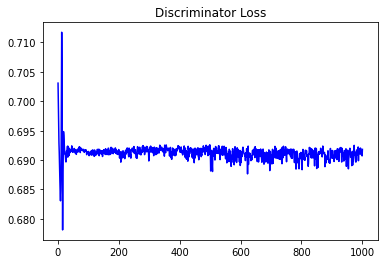

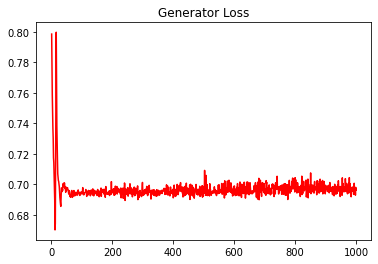

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1555722838532687


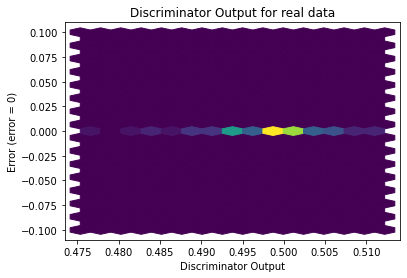

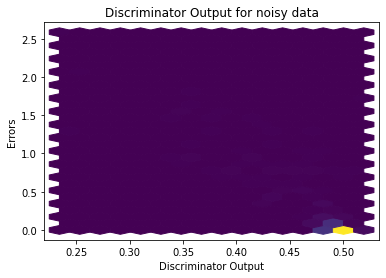

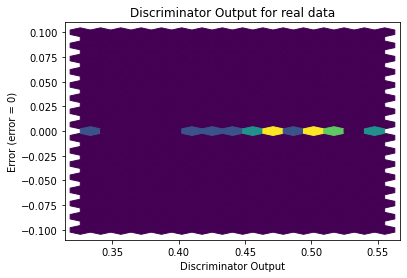

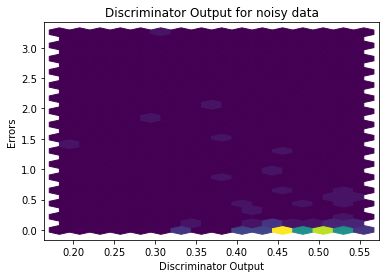

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


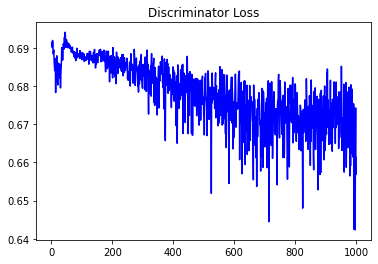

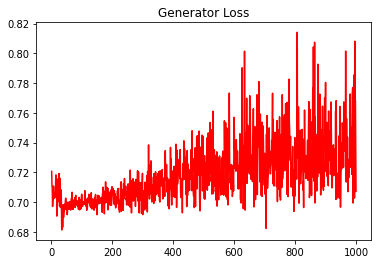

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.19972390645810345


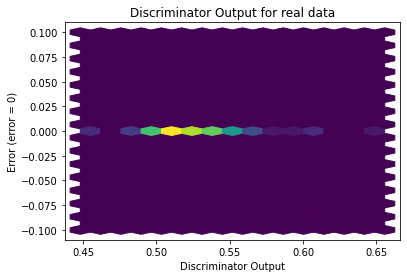

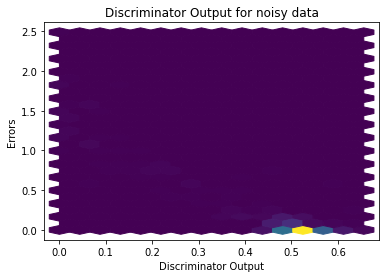

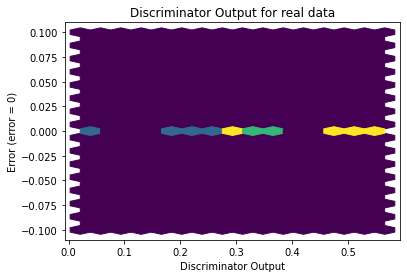

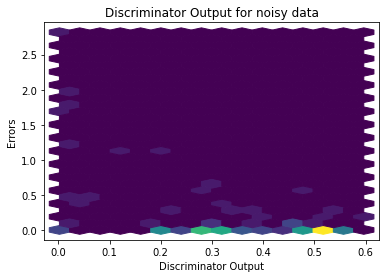

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1694]], requires_grad=True)
